C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


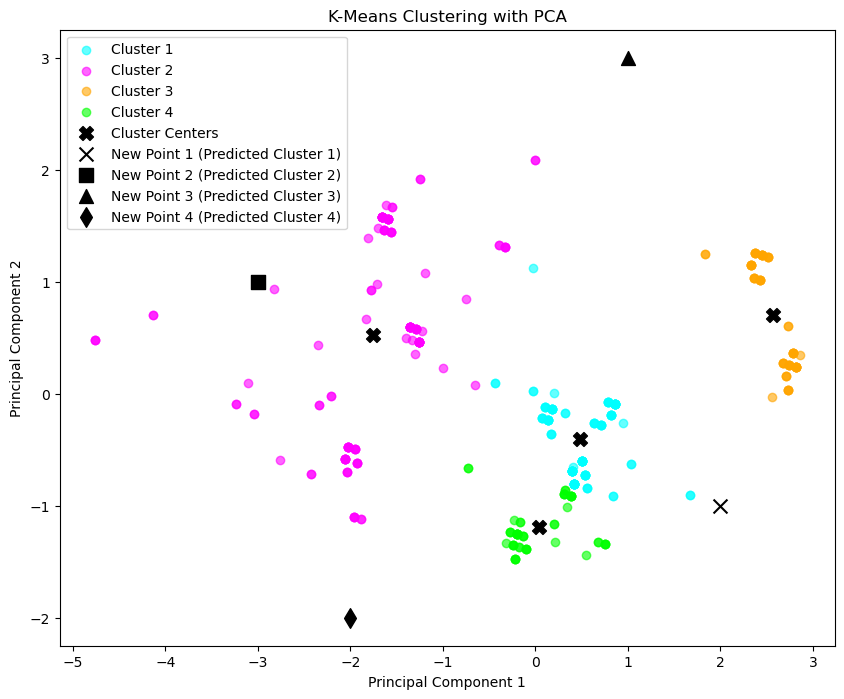

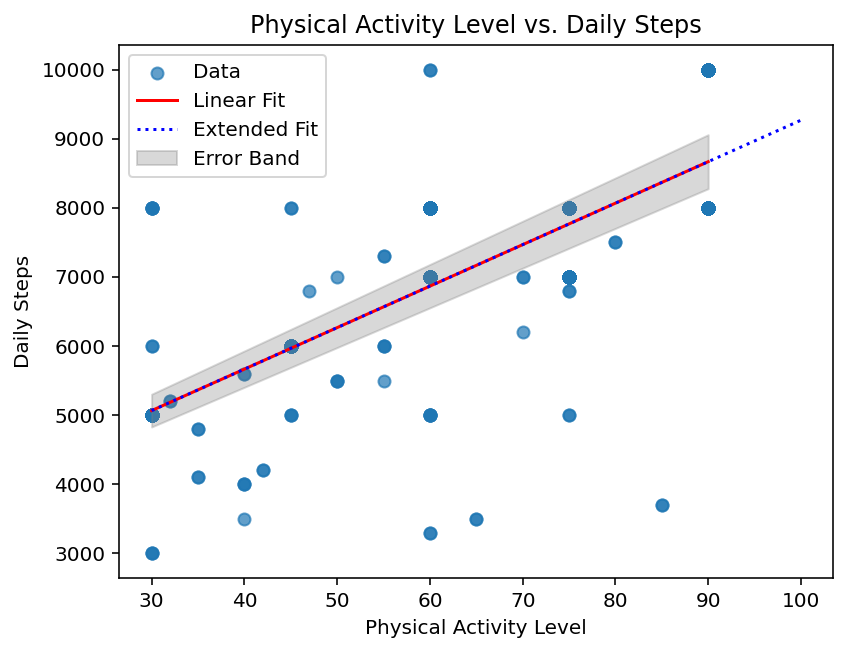

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

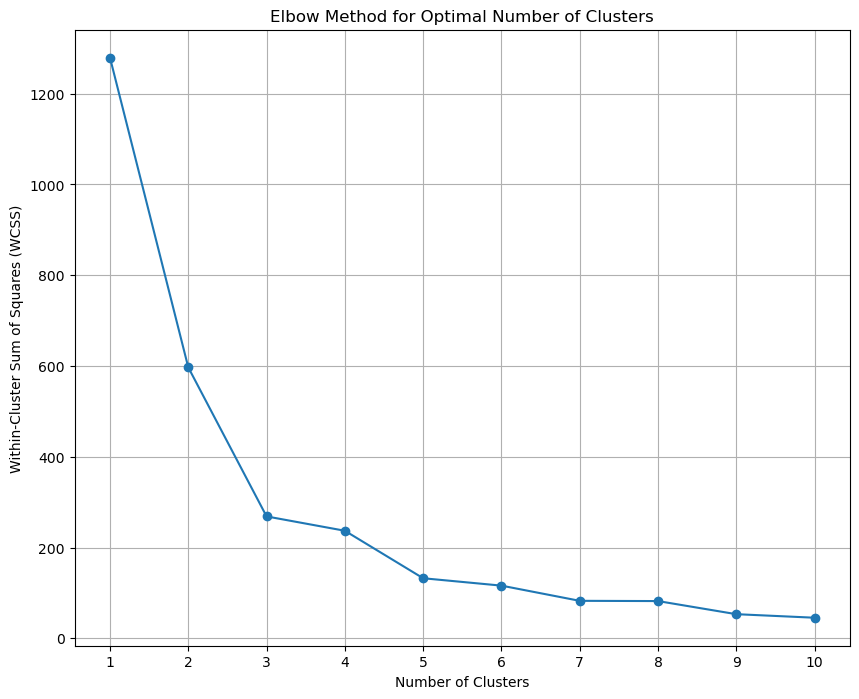

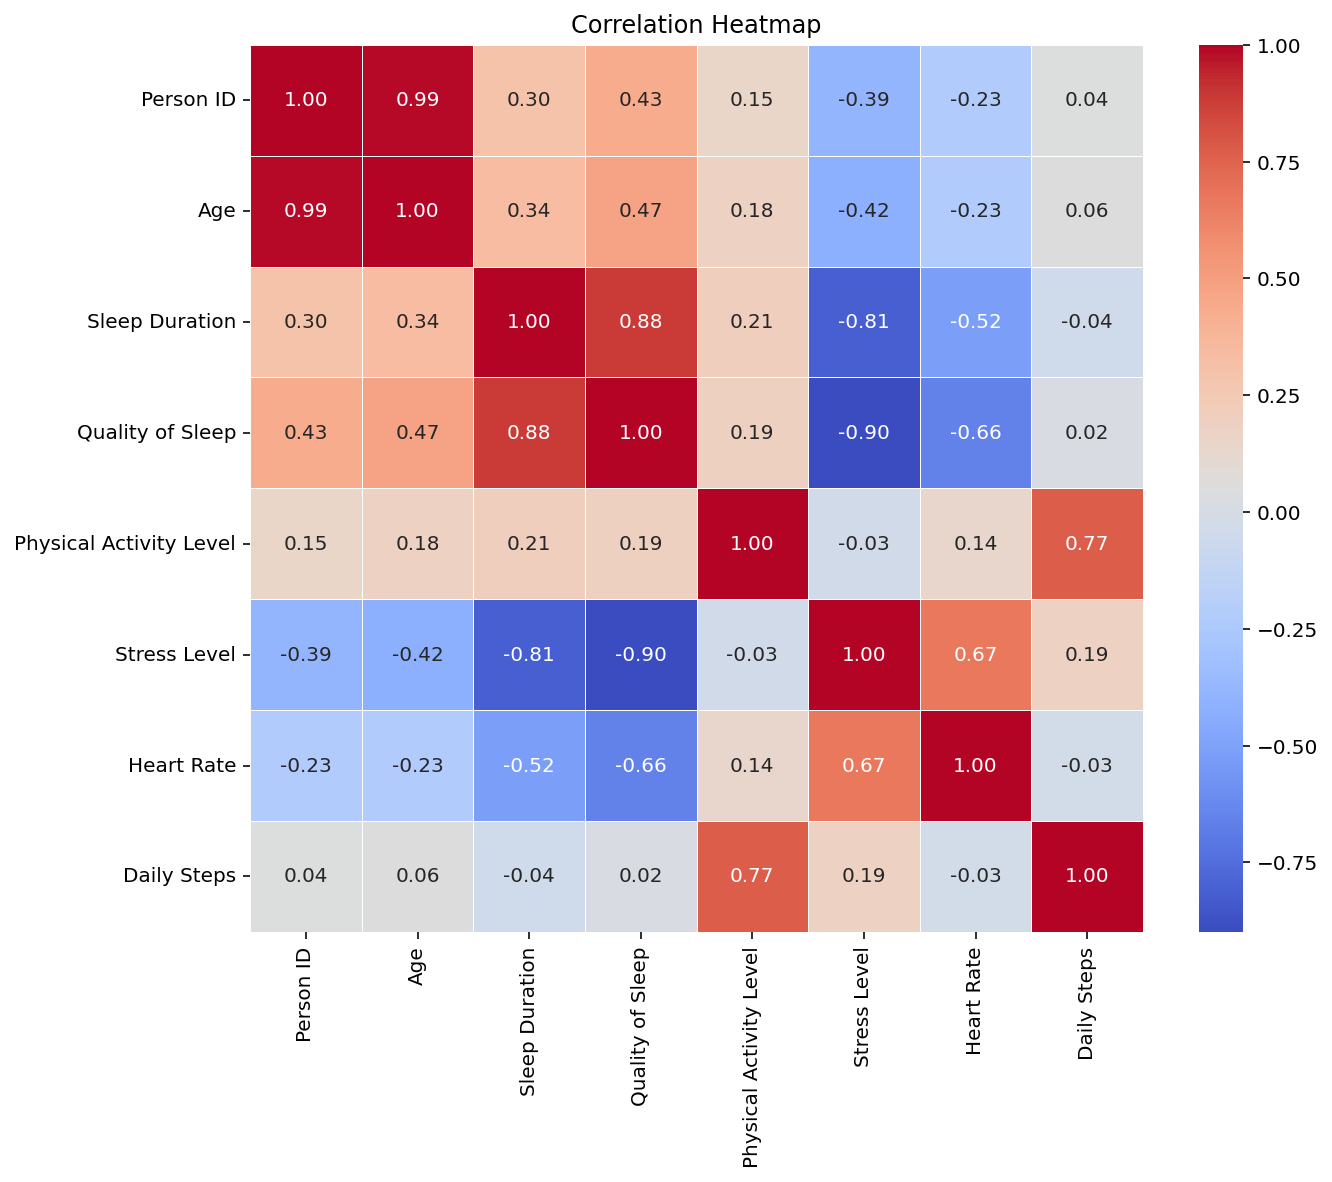

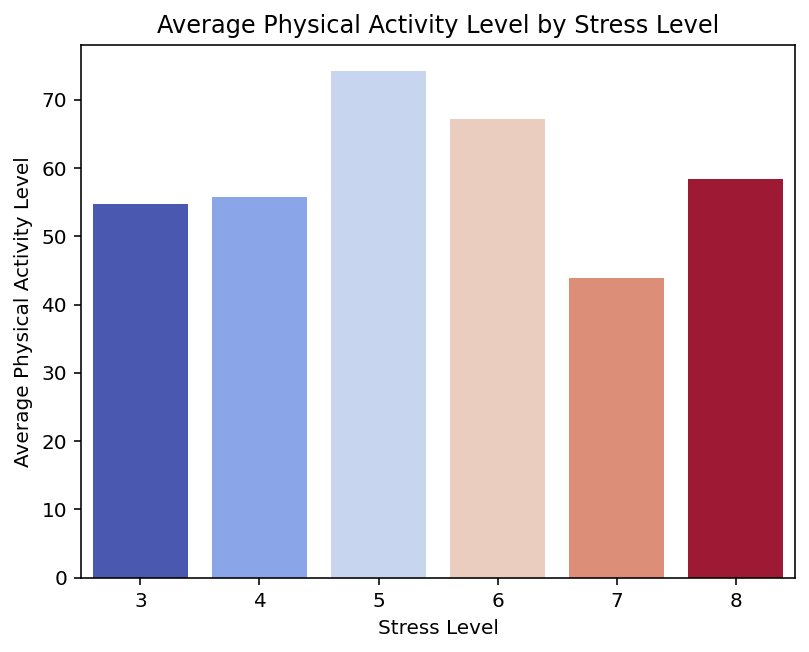

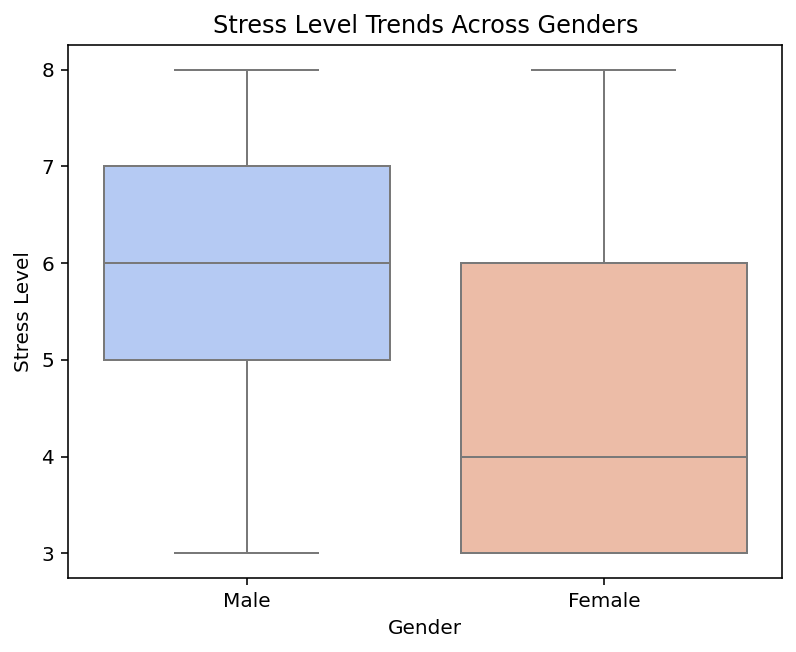

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit
import seaborn as sns

# Defining the linear fitting function
def linear(x, a, b):
    return a * x + b

# Reading the Dataset
FILE_PATH = 'Sleep_health_and_lifestyle_dataset.csv'
data = pd.read_csv(FILE_PATH)

# Defining columns for clustering which contains numerical values
NUMERICAL_COLS = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Heart Rate']

# Checking columns are in the dataset
if all(col in data.columns for col in NUMERICAL_COLS):
    # Data preprocessing
    scaler = StandardScaler()
    transformed_data = scaler.fit_transform(data[NUMERICAL_COLS])

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    pca_transformed_data = pca.fit_transform(transformed_data)

    # Fit KMeans with 4 clusters
    kmeans = KMeans(n_clusters=4, random_state=0)
    labels = kmeans.fit_predict(pca_transformed_data)

    # Define new points for prediction
    new_points = np.array([
        [2, -1],
        [-3, 1],
        [1, 3],
        [-2, -2]
    ])
    new_points_clusters = kmeans.predict(new_points)

    # Plotting clusters, estimated centers, and new points
    plt.figure(figsize=(10, 8))
    colors = ['cyan', 'magenta', 'orange', 'lime']
    markers = ['x', 's', '^', 'd']  # Markers for new points

    # Plot each cluster
    for i in range(4):
        plt.scatter(
            pca_transformed_data[labels == i, 0],
            pca_transformed_data[labels == i, 1],
            color=colors[i],
            label=f'Cluster {i+1}',
            alpha=0.6
        )

    # Plot cluster centers
    plt.scatter(
        kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        color='black',
        marker='X',
        s=100,
        label='Cluster Centers'
    )

    # Plot new points
    for i, point in enumerate(new_points):
        plt.scatter(
            point[0], point[1],
            color='black',
            marker=markers[i],
            s=100,
            label=f'New Point {i+1} (Predicted Cluster {new_points_clusters[i] + 1})'
        )
    # 1st Plotting graph
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-Means Clustering with PCA')
    plt.legend()
    plt.show()

# Selecting columns with numerical values
numerical_data = data.select_dtypes(include=[np.number])

# Select the relevant columns
x = numerical_data['Physical Activity Level']
y = numerical_data['Daily Steps']

# Fit the data to the linear model
popt, pcov = curve_fit(linear, x, y)
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = linear(x_fit, *popt)

# Predicting future values
future_value = 100
x_extended = np.linspace(x.min(), future_value, 500)
y_extended = linear(x_extended, *popt)

# Calculate the error band
y_err = np.sqrt(np.diag(pcov))
y_fit_upper = linear(x_fit, *(popt + y_err))
y_fit_lower = linear(x_fit, *(popt - y_err))

# Plotting fitting Grpah
plt.figure(dpi=144)
plt.scatter(x, y, label='Data', alpha=0.7, marker='o')
plt.plot(x_fit, y_fit, linestyle='solid', color='red', label='Linear Fit')
plt.plot(x_extended, y_extended, linestyle='dotted', color='blue', label='Extended Fit')
plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='gray', alpha=0.3, label='Error Band')
plt.xlabel('Physical Activity Level')
plt.ylabel('Daily Steps')
plt.legend()
plt.title('Physical Activity Level vs. Daily Steps')
plt.show()

# Compute the sum of squared distances (inertia) for a range of cluster numbers
wcss = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(pca_transformed_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(range_n_clusters, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

# Plotting correclation matrix
correlation_matrix = numerical_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8), dpi=144)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Plotting the Bar plot
plt.figure(dpi=144)
sns.barplot(x='Stress Level', y='Physical Activity Level', data=numerical_data, errorbar=None, hue='Stress Level', palette='coolwarm', dodge=False)
plt.xlabel('Stress Level')
plt.ylabel('Average Physical Activity Level')
plt.title('Average Physical Activity Level by Stress Level')
plt.legend([],[], frameon=False)  # Disable the legend
plt.show()

# Plotting Box Plot
plt.figure(dpi=144)
sns.boxplot(
    x=data['Gender'],
    y=numerical_data['Stress Level'],
    hue=data['Gender'],
    palette="coolwarm",
)
plt.xlabel('Gender')
plt.ylabel('Stress Level')
plt.title('Stress Level Trends Across Genders')
plt.show()